## Phenology

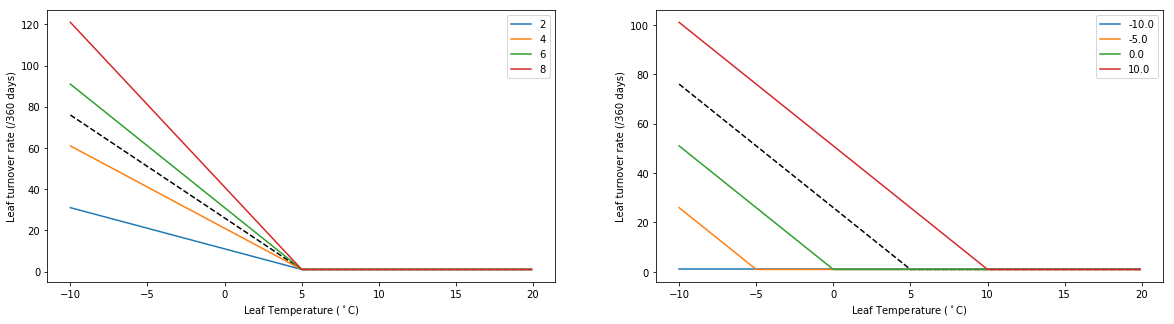

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pdb import set_trace  as browser
plt.rcParams['figure.figsize'] = (20.0, 5.0)
    
def gamma_lm(g0, T0, dT, T):
    glm = np.repeat(g0, len(T))
    glm[T < T0] *= (1 + dT * (T0 - T[T < T0]))
    #if T < T0: glm *= 
    return glm

g0 = 1.0
T_off_control = 5.0
d_T_control = 5.0

T_c = np.arange(-10, 20, 0.1)
T_off = [-10.0, -5.0, 0.0, 10.0]
d_T = np.arange(2, 10, 2)

glm_control = gamma_lm(g0, T_off_control, d_T_control, T_c)

def plotControl(): plt.plot(T_c, glm_control, 'k--')
  
plt.subplot(1,2,1)
plotControl()
for dT in d_T:
    glm = gamma_lm(g0, T_off_control, dT, T_c)
    plt.plot(T_c, glm, label = str(dT))

plt.legend()
#plt.yscale('log')
plt.xlabel('Leaf Temperature ($^\circ$C)')
plt.ylabel('Leaf turnover rate (/360 days)')


plt.subplot(1,2,2)
plotControl()
for TO in T_off:
    glm = gamma_lm(g0, TO, d_T_control, T_c)
    plt.plot(T_c, glm, label = str(TO))

plt.legend()
#plt.yscale('log')
plt.xlabel('Leaf Temperature ($^\circ$C)')
plt.ylabel('Leaf turnover rate (/360 days)')
plt.show()

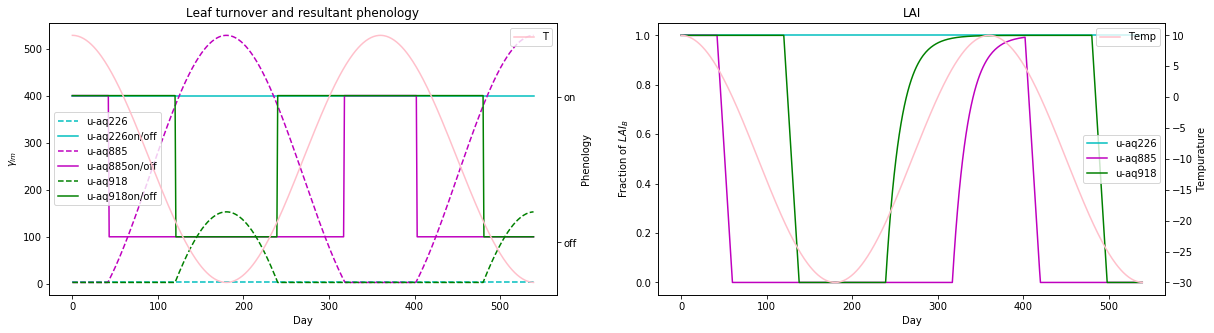

In [8]:
import math
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

#################
## Tempurature ##
#################
## Tempurature as a sine curve between 10 and -20
T_c =  -20 * np.sin(np.arange(-math.pi * 0.5, 2.5 * math.pi, math.pi / 180.0)) - 10.0

#########################
## Phenology functions ##
#########################
## leaf turnover rate
def gamma_lm(g0, T0, dT, T):
    if T >= T0:
        return g0
    else:
        return g0 * (1 + dT * (T0 - T))

## Phenology
def phen(phen_0, gamma_p, gamma_0, *args, **kw):
    glm = gamma_lm(gamma_0, *args, **kw)
    if glm > (2.0 * gamma_0):
        p = -gamma_p
    else:
        p =  gamma_p * (1.0 - phen_0)
    
    p =  phen_0 + p / 360.0
    if p < 0.0: p = 0.0
    return p

## LAI bases on phenology and balanced leaf area
def LAI_t(LAI_b, *args, **kw):
    p = phen(*args, **kw)
    LAI = LAI_b * p
    return LAI, p
    
## Evolving LAI with changing temperature.
def LAI(LAI_b, phen_0, T_c, gamma_p, gamma_0, T_off, d_T):
    LAI = np.repeat(LAI_b, len(T_c))
    p = 0
    for T in T_c:
        LAI[p], phen_0 = LAI_t(LAI_b, phen_0, gamma_p, gamma_0, T_off, d_T, T)
        p += 1
    
    return LAI

##############
## Plotting ##
##############
## Plotting tempurature
def T_C_plot(mult = 1.0, add = 0.0):
    plt.gca().twinx()
    plt.plot(mult * T_c + add, 'pink', label = 'Temp')
    plt.legend('Tempurature')


#######################################
## Plotting Turnover rate and on/off ##
#######################################
def glm_plot(label, c, g0, T0, dT, T_c):
    glm = [gamma_lm(g0, T0, dT, T) for T in T_c]
    ## leaf turnover
    plt.plot(glm, '--', c = c, label = label)
    
    ##leaf on/off
    glm = [100.0 if i > 2.0 * g0 else 400.0 for i in glm]
    plt.plot(glm, c = c, label = label + 'on/off')

## plotting each job
plt.subplot(1,2,1)
glm_plot('u-aq226', 'c', 3.0, 5.0, 0.0, T_c)
glm_plot('u-aq885', 'm', 3.0, 5.0, 5.0, T_c)
glm_plot('u-aq918', 'g', 3.0, -20.0, 5.0, T_c)

## adding metadata
plt.legend()
plt.ylabel('$\gamma_{lm}$')
plt.xlabel('Day')
T_C_plot((1.7/40), 1.0)
plt.yticks([0.0, 1.0], ['off', 'on'])
plt.ylabel('Phenology')
plt.title('Leaf turnover and resultant phenology')
    
##############################
## Plotting Leaf Area Index ##
##############################
def LAI_plot(label, line, *args, **kw):
    lai = LAI(*args, **kw)
    plt.plot(lai, line, label = label)
    return lai

## on individual jobs
plt.subplot(1,2,2)
lai = LAI_plot('u-aq226', 'c', 1.0, 1.0, T_c, 20, 3, 0, 0)
lai = LAI_plot('u-aq885', 'm', 1.0, 1.0, T_c, 20, 3.0, 5.0, 5.0)
lai = LAI_plot('u-aq918', 'g', 1.0, 1.0, T_c, 20, 3.0, -20.0, 5.0)

## adding metadata
plt.ylabel('Fraction of $LAI_B$')
plt.xlabel('Day')

plt.legend()
T_C_plot()
plt.ylabel('Tempurature')
plt.legend()
plt.title('LAI')
plt.show()